# Eigenvectors: Introduction to Latent Variable Models

## We introduce here with a small data set the idea of a Latent Variable. 
## We will use simple Linear Algebra methods to estimate the Latent Variables.  
## This a powerful approach to simplify and understand the nature of multi-variable data. 

In [20]:
import numpy as np
from numpy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt


## Eigenvalues and Eigenvectors of a Square Symmetric matrix. 

In [21]:
A = np.array([[2 ,-1],[-1,3]])  
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)
 


In [22]:
print(A)

[[ 2 -1]
 [-1  3]]


## The linalg (Linear Algebra) function eig, returns the eigenvalues and eigenvectors of a 
## square symmetric matrix.  

In [23]:
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)

In [24]:
print('eigenvectors')
print(v)
print('eigenvalues')
print(d)

eigenvectors
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
eigenvalues
[1.38196601 3.61803399]


## In interpreting the eigenvectors, remember that the eigenvector is a column vector. 
## So the first eigenvector is v[:,0] 

In [25]:
z = np.transpose(v)@A@v #show that transformed matrix is diagonal
print(z)


[[ 1.38196601e+00 -1.11022302e-16]
 [-2.22044605e-16  3.61803399e+00]]


In [26]:
eeg = loadmat('data/eeg.mat') #Load 2 channels of EEG
x = eeg['Occ'][0]
x = x - np.mean(x) #I need to follow my own rule and remove the mean. 
y = eeg['Fro'][0]
y = y -np.mean(y) #I need to follow my own rule and remove the mean.
xy= np.array([x,y])

Text(0, 0.5, 'Channel Frontal')

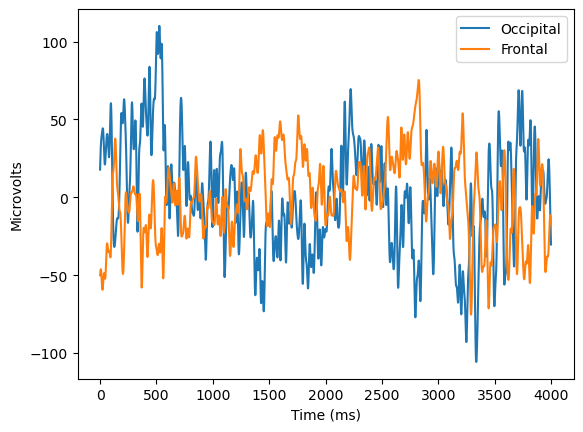

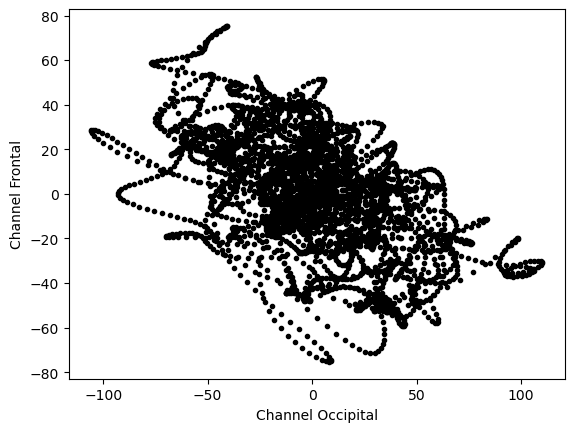

In [27]:
plt.figure()
plt.plot(xy[0,:],label = 'Occipital')
plt.plot(xy[1,:],label = 'Frontal')
plt.xlabel('Time (ms)')
plt.ylabel('Microvolts')
plt.legend()
plt.figure()
plt.plot(xy[0,:],xy[1,:],'k.')
plt.xlabel('Channel Occipital')
plt.ylabel('Channel Frontal')

## BIG PICTURE IDEA -> I want to learn how to represent these data by two new variables that are rotations of the original data, and which will have several advantages for me in terms of representing the data in a simpler way:
* ### Removing Correlation Between Variables 
* ### Reducing the Number of Variable (Dimensionality Reduction)  

![](images/pc.png)

[[1204.11003582 -449.68332931]
 [-449.68332931  652.87006965]]


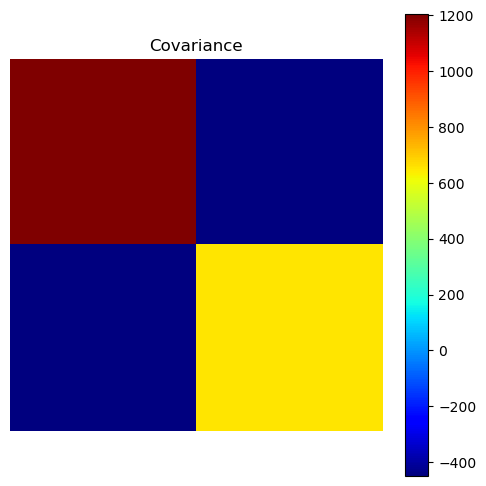

In [28]:
C = np.cov(xy)  #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
                #In practice this wont matter, but theory prefers you dont. 
Cmult = (1/(4000-1))*(xy@np.transpose(xy)) #compute covariance by matrix multiplication
print(C)
plt.figure(figsize = (6,6))
plt.imshow(C,cmap = 'jet')
plt.axis("off")
plt.colorbar()
plt.title('Covariance')
plt.show()

[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]


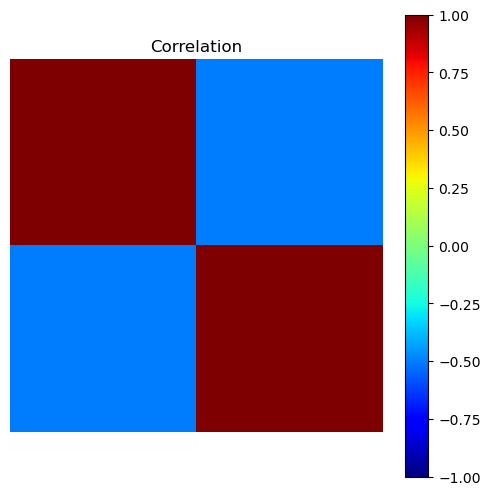

In [29]:
R = np.corrcoef(xy) #compute correlation coefficient
print(R)
plt.figure(figsize = (6,6))
plt.imshow(R,cmap = 'jet',vmin = -1, vmax =1)
plt.axis("off")
plt.colorbar()
plt.title('Correlation')
plt.show()

In [30]:
d,v = linalg.eig(C) #Compute Eigenvalues and Eigenvectors of C
print('Covariance')
print(C)
print('Eigenvector')
print(v)
print('Eigenvalues')
print(d)

Covariance
[[1204.11003582 -449.68332931]
 [-449.68332931  652.87006965]]
Eigenvector
[[ 0.87251721  0.48858338]
 [-0.48858338  0.87251721]]
Eigenvalues
[1455.9191681   401.06093737]


## The eigenvalues contain valuable information about **variance** in the data. 
## 

In [31]:
total_variance = np.sum(np.diag(C))
print(total_variance)
total_eigenvalue = np.sum(d)
print(total_eigenvalue)

1856.9801054743539
1856.9801054743539


## The eigenvectors are a rotation matrix that can rotate the data into a new coordinate system.  
## The new coordinate system will preserve all of the variance of the original data, with some useful additional properties. 

In [32]:
Lambda = np.transpose(v)@C@v #Use eigenvectors to compute Diagonal matrix
xprime = v[:,0]@xy #project data onto new variables by a weighted sum
yprime = v[:,1]@xy 
xyprime = np.transpose(v)@xy #project data onto new variables by matrix multiplication in 1 step.

Text(0, 0.5, 'Channel PC2')

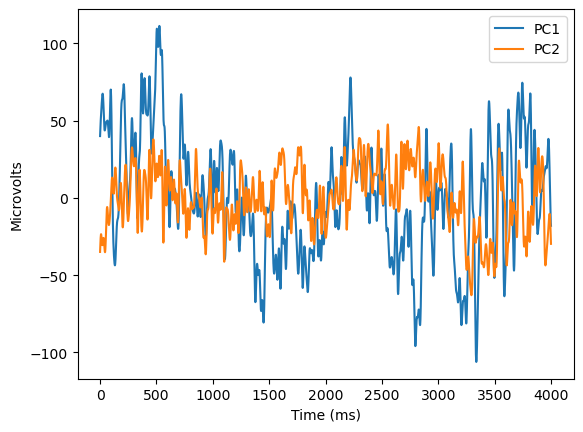

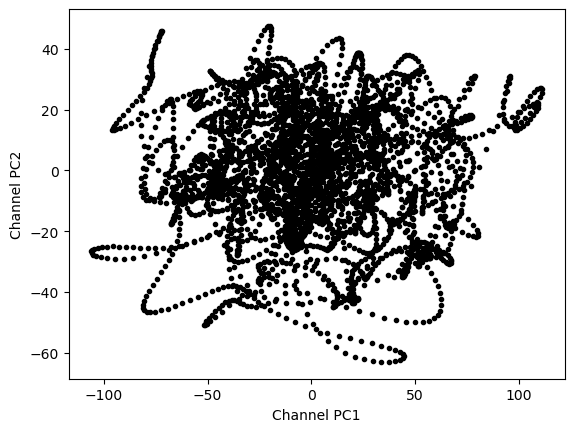

In [33]:
plt.figure()
plt.plot(xyprime[0,:],label = 'PC1')
plt.plot(xyprime[1,:],label = 'PC2')
plt.xlabel('Time (ms)')
plt.ylabel('Microvolts')
plt.legend()
plt.figure()
plt.plot(xyprime[0,:],xyprime[1,:],'k.')
plt.xlabel('Channel PC1')
plt.ylabel('Channel PC2')

## These figures above show the latent variables, i.e., the mixture of the original variables to define new variables.    
## There are two important things happening here:
* ### The first latent variable is selecting for the direction in the data with the most variance. We refer to this as the first **principal component**
* ### The second latent variable must be perpendicular to the first latent variable, because this is a rotation matrix of the original data space. As a consequence the second **principal component** is perpendicular to the first principal component.  

Covariance of Principal Components
[[1.45591917e+03 4.27569402e-14]
 [4.27569402e-14 4.01060937e+02]]
Correlation of Principal Components
[[1.00000000e+00 5.59542146e-17]
 [5.59542146e-17 1.00000000e+00]]


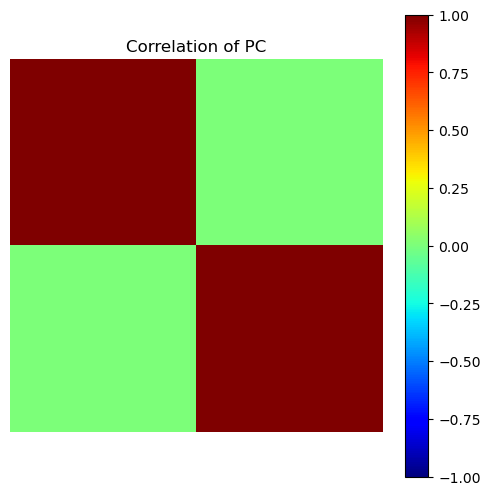

In [35]:
Cprime = np.cov(xyprime) #covariance matrix of new variables 
print('Covariance of Principal Components')
print(Cprime)
print('Correlation of Principal Components')
Rprime = np.corrcoef(xyprime) #correlation matrix of new variables 
print(Rprime)
R = np.corrcoef(xy) #compute correlation coefficient
plt.figure(figsize = (6,6))
plt.imshow(Rprime,cmap = 'jet',vmin = -1, vmax =1)
plt.axis("off")
plt.colorbar()
plt.title('Correlation of PC')
plt.show()

## I have gone through the math here of a method called **Principal Components Analysis**.  
### **PCA** is the entry point into a wide variety of methods of dimensional reduction and latent variable estimation.  These methods all have different approaches and goals, but arrive at the same thing -> a set of new variables obtained by a linear mixture of the original variables. 
## Why should i care? 
* ### Most machine learning and data modeling algorithms will perform poorly if the predictors are highly correlated. We need someway to remove that correlation while retaining all the information in the data. 
* ### All data analysis methods perform poorly or fail if the number of observations is smaller than the number of variables.  This is a constant problem in any field that processes images, including brain imaging data.  